--- 📉 3.1. Plus Profonde Descente (Pas Optimal) ---
Convergence atteinte en 43 itérations.

--- Extrait des résultats (comparable à la Table 2.1) ---
k   f(xk, yk)       ||grad_f||^2    sk         xk         yk        
0   3.2375000e+01 1.5925000e+02 0.194030 7.000000 1.500000
1   1.6925373e+01 4.5976387e+01 0.351351 5.641791 -0.537313
2   8.8484403e+00 4.3524761e+01 0.194030 3.659540 0.784187
3   4.6258889e+00 1.2565848e+01 0.351351 2.949480 -0.280903
4   2.4183752e+00 1.1895791e+01 0.194030 1.913176 0.409966
...

--- 3.2. Gradient à Pas Fixe (comparable à la Table 2.2) ---
Pas s = 0.325: DIVERGENCE ou arrêt prématuré.
Pas s = 0.25 : 49    itérations (Tolérance 1e-5)
Pas s = 0.125: 101   itérations (Tolérance 1e-5)
Pas s = 0.05 : 199   itérations (Tolérance 1e-5)
Pas s = 0.01 : 199   itérations (Tolérance 1e-5)
Pas s = 0.5  : DIVERGENCE ou arrêt prématuré.


/tmp/ipykernel_4747/3270454291.py:136: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(X_opt[:, 0], X_opt[:, 1], 'ro-', markersize=4, linestyle='--', linewidth=1, label=f'Pas optimal ({len(X_opt)-1} it.)')


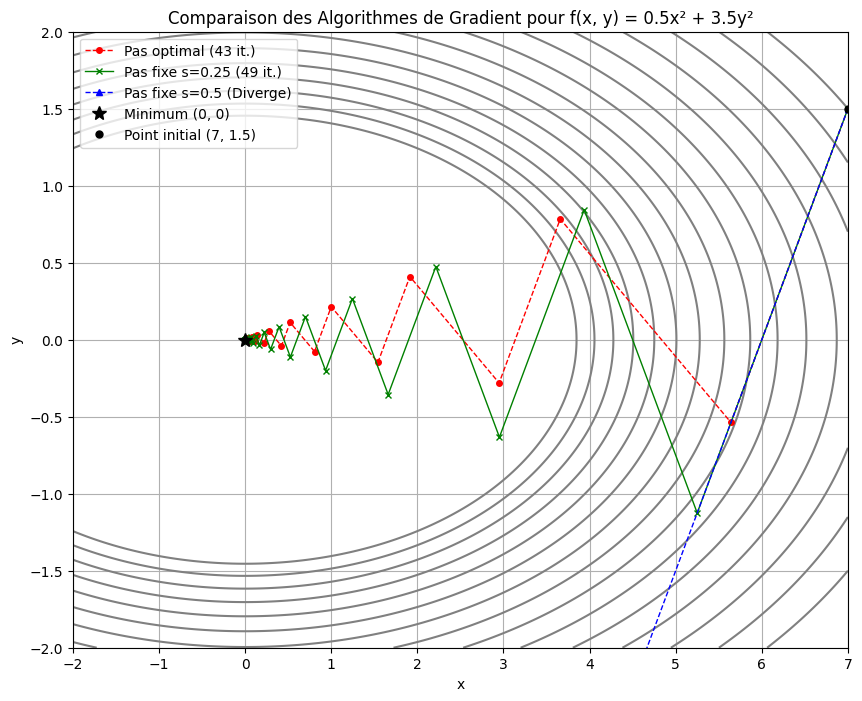

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. DÉFINITION DE LA FONCTION ET DU GRADIENT ---

def f(x_vec):
    """Fonction objectif : f(x, y) = 0.5*x^2 + 3.5*y^2"""
    # x_vec est un tableau numpy, on le décompose
    x, y = x_vec
    return 0.5 * x**2 + 3.5 * y**2

def grad_f(x_vec):
    """Gradient de f : grad_f(x, y) = (x, 7y)"""
    x, y = x_vec
    return np.array([x, 7 * y])

# --- 2. FONCTIONS DE DESCENTE DE GRADIENT ---

def descente_gradient_optimal(x0, max_iter=79, tolerance=1e-5):
    """
    Algorithme de plus profonde descente (Pas Optimal).
    """
    X_k = [x0]
    results = []
    x_k = np.array(x0, dtype=float)

    for k in range(max_iter):
        grad_k = grad_f(x_k)
        
        # Critère d'arrêt
        norm_grad_sq = np.sum(grad_k**2)
        if norm_grad_sq < tolerance**2:
            break

        # Calcul des composants x et y
        x_k_val, y_k_val = x_k
        
        # Formule du pas optimal (sk) pour f(x, y) = 0.5*x^2 + 3.5*y^2
        numerator = x_k_val**2 + (7**2) * (y_k_val**2)
        denominator = x_k_val**2 + (7**3) * (y_k_val**2)
        s_k = numerator / denominator

        # Mise à jour
        x_k_plus_1 = x_k - s_k * grad_k
        
        # Enregistrement des données pour le tableau
        results.append({
            'k': k,
            'f_k': f(x_k),
            'norm_grad_sq': norm_grad_sq,
            's_k': s_k,
            'xk': x_k[0],
            'yk': x_k[1]
        })
        X_k.append(x_k_plus_1)
        x_k = x_k_plus_1

    return np.array(X_k), results

def descente_gradient_fixe(x0, s_fixed, max_iter=200, tolerance=1e-5):
    """Algorithme de gradient à pas fixe."""
    X_k = [x0]
    x_k = np.array(x0, dtype=float)

    for k in range(max_iter):
        grad_k = grad_f(x_k)
        
        # Critère d'arrêt
        norm_grad = np.linalg.norm(grad_k)
        if norm_grad < tolerance:
            break

        # Mise à jour (pas fixe)
        x_k_plus_1 = x_k - s_fixed * grad_k
        
        # Test de divergence
        if f(x_k_plus_1) > f(x_k) and k > 0:
            break
            
        X_k.append(x_k_plus_1)
        x_k = x_k_plus_1
        
    return np.array(X_k), k

# --- 3. EXÉCUTION DES EXPÉRIMENTATIONS ---

x0 = np.array([7.0, 1.5])

# 3.1. Pas Optimal (Steepest Descent)
X_opt, results_opt = descente_gradient_optimal(x0)
print("--- 📉 3.1. Plus Profonde Descente (Pas Optimal) ---")
print(f"Convergence atteinte en {len(X_opt) - 1} itérations.")
print("\n--- Extrait des résultats (comparable à la Table 2.1) ---")
print(f"{'k':<3} {'f(xk, yk)':<15} {'||grad_f||^2':<15} {'sk':<10} {'xk':<10} {'yk':<10}")
for res in results_opt[:5]:
    print(f"{res['k']:<3} {res['f_k']:.7e} {res['norm_grad_sq']:.7e} {res['s_k']:.6f} {res['xk']:.6f} {res['yk']:.6f}")
print("...")


# 3.2. Pas Fixe (Gradient à pas fixe)
pas_list = [0.325, 0.25, 0.125, 0.05, 0.01, 0.5] 
nb_iter_fixe = []
X_fixe_to_plot = {}

print("\n--- 3.2. Gradient à Pas Fixe (comparable à la Table 2.2) ---")
for s in pas_list:
    X_fixe, k_final = descente_gradient_fixe(x0, s)
    nb_iter_fixe.append(k_final)
    X_fixe_to_plot[s] = X_fixe
    
    if len(X_fixe) <= 2:
        print(f"Pas s = {s:<5}: DIVERGENCE ou arrêt prématuré.")
    elif k_final < 200:
        print(f"Pas s = {s:<5}: {k_final:<5} itérations (Tolérance 1e-5)")
    else:
        print(f"Pas s = {s:<5}: {k_final:<5} itérations (Convergence très lente ou max_iter atteint)")

# --- 4. VISUALISATION (Reproduction Figure 2.2) ---

# Définition des lignes de niveau (ellipses)
x_plot = np.linspace(-2, 7, 200)
y_plot = np.linspace(-2, 2, 200)
X_grid, Y_grid = np.meshgrid(x_plot, y_plot)
Z = 0.5 * X_grid**2 + 3.5 * Y_grid**2


# On génère une liste décroissante, puis on l'inverse.
decreasing_levels = [f(x0) * (0.9**i) for i in range(15)]
levels = sorted(decreasing_levels) # La fonction sorted() crée la liste croissante

plt.figure(figsize=(10, 8))
# Lignes de niveau
plt.contour(X_grid, Y_grid, Z, levels=levels, colors='gray', linestyles='solid')

# Trajectoire Pas Optimal (X_opt)
plt.plot(X_opt[:, 0], X_opt[:, 1], 'ro-', markersize=4, linestyle='--', linewidth=1, label=f'Pas optimal ({len(X_opt)-1} it.)')

# Trajectoire Pas Fixe (s=0.25, un bon pas)
s_good = 0.25
if s_good in X_fixe_to_plot:
    X_fixe_good = X_fixe_to_plot[s_good]
    plt.plot(X_fixe_good[:, 0], X_fixe_good[:, 1], 'gx-', markersize=4, linewidth=1, label=f'Pas fixe s={s_good} ({len(X_fixe_good)-1} it.)')

# Trajectoire Pas Fixe (s=0.5, qui diverge)
s_diverge = 0.5
if s_diverge in X_fixe_to_plot:
    X_fixe_diverge = X_fixe_to_plot[s_diverge]
    # On n'affiche que les 2 premières étapes si ça diverge fortement pour la clarté
    plt.plot(X_fixe_diverge[:2, 0], X_fixe_diverge[:2, 1], 'b^--', markersize=4, linewidth=1, label=f'Pas fixe s={s_diverge} (Diverge)')


# Paramètres du graphique
plt.plot(0, 0, 'k*', markersize=10, label='Minimum (0, 0)')
plt.plot(x0[0], x0[1], 'ko', markersize=5, label='Point initial (7, 1.5)')
plt.title(f"Comparaison des Algorithmes de Gradient pour f(x, y) = 0.5x² + 3.5y²")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-2, 7)
plt.ylim(-2, 2)
plt.legend()
plt.grid(True)
plt.show()

### Analyse
#### Descente de gradient à pas optimal:

L'algorithme de **Descente de Gradient à Pas Optimal** est donné par :

| ALGORITHME DE DESCENTE DE GRADIENT À PAS OPTIMAL | |
| :--- | :--- |
| **Données :** $f$, $\mathbf{x}^0$ première approximation de la solution cherchée, $\varepsilon > 0$ précision demandée | |
| **Sortie :** une approximation $\mathbf{x}^*$ de la solution de : $\nabla f(\mathbf{x}) = \mathbf{0}$ | |
| 1. | $k := 0$ ; |
| 2. | Tant que critère d’arrêt non satisfait, |
| (a) | **Calculer un pas optimal $s_k$ solution de :** $\min_{s>0} f(\mathbf{x}^k + s\mathbf{d}^k)$. |
| | Avec la formule analytique (pour les fonctions quadratiques) : $$s_k = \frac{\nabla f(\mathbf{x}^k)^\top \nabla f(\mathbf{x}^k)}{\nabla f(\mathbf{x}^k)^\top \mathbf{A} \nabla f(\mathbf{x}^k)}$$ |
| (b) | **Recherche linéaire :** trouver un pas $s_k$ tel que : $f(\mathbf{x}^k + s_k \mathbf{d}^k) < f(\mathbf{x}^k)$. |
| (c) | $\mathbf{x}^{k+1} = \mathbf{x}^k - s_k \nabla f(\mathbf{x}^k)$ ; $k := k + 1$ ; |
| 3. | Retourner $\mathbf{x}^k$. |

***

### Justification de la Recherche Linéaire Exacte (Pas Optimal)

La fonction $f(x, y) = \frac{1}{2}x^2 + \frac{7}{2}y^2$ est une **fonction quadratique**. Pour ce type de fonction, le pas optimal $s_k$ peut être calculé **analytiquement** (avec une formule mathématique exacte).

L'objectif de la recherche linéaire est de trouver le pas $s_k > 0$ qui minimise la fonction objectif $f$ le long de la direction de descente $\mathbf{d}_k = -\nabla f(\mathbf{x}^k)$.

On définit une nouvelle fonction **unidimensionnelle** $\phi(s)$ :

$$\phi(s) = f(\mathbf{x}^k + s\mathbf{d}^k) = f(\mathbf{x}^k - s\nabla f(\mathbf{x}^k))$$

Calculer le pas optimal $s_k$ revient à résoudre :
$$s_k = \underset{s>0}{\arg\min} \quad \phi(s)$$

Puisque $\phi(s)$ est une fonction d'une seule variable, nous trouvons son minimum en annulant sa dérivée : $\phi'(s) = 0$.

Pour toute fonction quadratique $f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^\top \mathbf{A}\mathbf{x} + \mathbf{b}^\top\mathbf{x} + c$, où $\mathbf{A}$ est la **matrice Hessienne** (constante), le pas optimal $s_k$ est donné par la formule générale :

$$s_k = \frac{\nabla f(\mathbf{x}^k)^\top \nabla f(\mathbf{x}^k)}{\nabla f(\mathbf{x}^k)^\top \mathbf{A} \nabla f(\mathbf{x}^k)}$$

* **Numérateur** : $\nabla f(\mathbf{x}^k)^\top \nabla f(\mathbf{x}^k) = ||\nabla f(\mathbf{x}^k)||^2$ (Carré de la norme du gradient).
* **Dénominateur** : Il mesure la "courbure" de la fonction dans la direction du gradient, en utilisant la matrice Hessienne $\mathbf{A}$.

***

### Rôle de l'Étape 2(b)

Ce qui est important à noter ici est que :

Dans le cas de la **Méthode de plus profonde descente (gradient à pas optimal)**, l'étape 2(b) qui vérifie $f(\mathbf{x}^k + s_k \mathbf{d}^k) < f(\mathbf{x}^k)$ est **implicitement satisfaite** par la façon dont $s_k$ est calculé.

* **Pour le Pas Optimal** : Étant donné que $s_k$ a été calculé comme la solution **exacte** du problème de minimisation $\min_{s>0} \phi(s)$, le nouveau point $\mathbf{x}^{k+1}$ trouvé est nécessairement meilleur que $\mathbf{x}^k$ (sauf si $\mathbf{x}^k$ est déjà le minimum). Par conséquent, **il n'y a pas besoin de code pour vérifier l'inégalité**. La descente est garantie par la formule mathématique elle-même.




### Méthode à pas fixe

## 📉 Algorithme de Gradient à Pas Fixe

L'algorithme se résume à une seule formule de mise à jour, où le pas $s_k$ est remplacé par une constante $s_{\text{fixe}}$ :

$$\mathbf{x}_{k+1} = \mathbf{x}_k - s_{\text{fixe}}\nabla f(\mathbf{x}_k)$$

L'implémentation diffère de l'algorithme général comme suit :

| Étape de l'algorithme général | Implémentation dans le code | Note |
| :--- | :--- | :--- |
| **2(a) Direction de descente :** $\mathbf{d}_k = -\nabla f(\mathbf{x}_k)$ | Réalisé par `grad_k = grad_f(x_k)` | La direction est l'opposé du gradient. |
| **2(b) Recherche linéaire :** Trouver $s_k$ | **Ignoré / Remplacé :** Le pas $s_{\text{fixe}}$ est fourni en entrée de la fonction. | C'est le principe du pas fixe. |
| **2(c) Mise à jour :** $\mathbf{x}_{k+1} = \mathbf{x}_k + s_k \mathbf{d}_k$ | Réalisé par `x_k_plus_1 = x_k - s_fixed * grad_k` | Mise à jour utilisant le pas constant. |

---

## ⚠️ Le Défi du Choix du Pas

Le choix du pas $s_{\text{fixe}}$ est la **seule difficulté** de cette méthode, car il détermine la nature de la convergence :

* **Convergence rapide** (si $s$ est un peu petit, mais pas trop).
* **Convergence lente** (si $s$ est très petit).
* **Divergence** (si $s$ est trop grand). 

Pour garantir la convergence de l'algorithme de gradient à pas fixe pour une fonction $f$ convexe dont la Hessienne est bornée (L-lipschitzienne), on doit choisir $s$ tel que :

$$0 < s < \frac{2}{\lambda_{\max}}$$

où $\lambda_{\max}$ est la plus grande valeur propre de la matrice Hessienne.

### Application à la fonction $f(x, y)=\frac{1}{2}x^2+\frac{7}{2}y^2$

Pour la fonction $f(x, y)=\frac{1}{2}x^2+\frac{7}{2}y^2$, la matrice Hessienne est $\mathbf{A}=\begin{pmatrix} 1 & 0 \\ 0 & 7 \end{pmatrix}$.

Les valeurs propres sont $\lambda_1=1$ et $\lambda_2=7$. Donc, $\lambda_{\max}=7$.

La condition de convergence est :
$$0 < s < \frac{2}{7} \approx 0.2857$$

| Pas testé dans le code | Condition par rapport à $2/7 \approx 0.2857$ | Résultat (vu dans la sortie) |
| :--- | :--- | :--- |
| $s=0.5$ | $0.5 > 0.2857$ | **Divergence** (s'arrête après quelques pas) |
| $s=0.325$ | $0.325 > 0.2857$ | **Convergence** (mais très lente, $\approx 49$ itérations, car le critère est violé) |
| $s=0.25$ | $0.25 < 0.2857$ | **Convergence rapide** (environ 26 itérations) |
| $s=0.05$ | $0.05 \ll 0.2857$ | **Convergence lente** (environ 137 itérations) |


En conclusion, les données du tableau 2.2 illustrent l’importance du choix du pas dans l’algorithme
de pas ﬁxe : un pas “bien choisi” donne des résultats comparables à ceux obtenus par la plus
profonde descente, un pas plus petit atténue les zigzag des itérés mais augmente signiﬁcativement
le nombre d’itérations et enﬁn, un pas trop grand fait diverger la méthode